In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)
#test change

In [3]:
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
#removed non labled versions of rows
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
print(url)

https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=af4a7c461bcda111515e0ebeea5e4124fcc267d6


In [4]:
#get=GEO_ID,NAME,EMP,NATION,PAYANN,STATE,YEAR
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
#removed non labled versions of rows
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
stateurl = url = f"https://api.census.gov/data/2018/abscs?get={get}&for=state:*&key={apikey}"

r = requests.get(url)
print(r)
stater = requests.get(stateurl)
print(stater)

r = r.json()
r = json.dumps(r)

stater = stater.json()
stater = json.dumps(stater)

<Response [200]>
<Response [200]>


In [30]:

p = pd.read_json(r)
p.head(10)

headers = p.iloc[0]
new_p  = pd.DataFrame(p.values[1:], columns=headers)
#remove columns we don't need
new_p = new_p.drop(columns =['SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'EMP_S_F'])
usadata = new_p.rename({"NAICS2017_LABEL": "Industry", 
                    "SEX_LABEL": "Sex",
                    "FIRMPDEMP": "EmpFirms",
                    "ETH_GROUP_LABEL": "Eth", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')

usadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261397 entries, 0 to 261396
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   GEO_ID       261397 non-null  object
 1   NAME         261397 non-null  object
 2   NAICS2017    261397 non-null  object
 3   Industry     261397 non-null  object
 4   Sex          261397 non-null  object
 5   Eth          261397 non-null  object
 6   Race         261397 non-null  object
 7   Vet          261397 non-null  object
 8   EMPSZFI      261397 non-null  object
 9   EmpFirms     261397 non-null  object
 10  RCPPDEMP     261397 non-null  object
 11  EMP          261397 non-null  object
 12  PAYANN       261397 non-null  object
 13  PAYANN_F     171599 non-null  object
 14  FIRMPDEMP_S  261397 non-null  object
 15  RCPPDEMP_S   261397 non-null  object
 16  EMP_S        261397 non-null  object
 17  PAYANN_S     261397 non-null  object
 18  state        261397 non-null  object
dtypes:

In [16]:

statedatap = pd.read_json(stater)
statedatap.head(10)

headers = statedatap.iloc[0]
statedata  = pd.DataFrame(statedatap.values[1:], columns=headers)
#remove columns we don't need
statedata = statedata.drop(columns =['ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F','EMP_S_F', 'FIRMPDEMP_F'])
statedata = statedata.rename({"NAICS2017_LABEL": "Industry",
                    "SEX_LABEL": "Sex",  
                    "ETH_GROUP_LABEL": "Eth", 
                    "FIRMPDEMP": "EmpFirms", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "NAME": "Name",
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')
statedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261397 entries, 0 to 261396
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   GEO_ID       261397 non-null  object
 1   Name         261397 non-null  object
 2   NAICS2017    261397 non-null  object
 3   Industry     261397 non-null  object
 4   SEX          261397 non-null  object
 5   Sex          261397 non-null  object
 6   Eth          261397 non-null  object
 7   Race         261397 non-null  object
 8   Vet          261397 non-null  object
 9   EMPSZFI      261397 non-null  object
 10  EmpFirms     261397 non-null  object
 11  RCPPDEMP     261397 non-null  object
 12  RCPPDEMP_F   261397 non-null  object
 13  EMP          261397 non-null  object
 14  EMP_F        171599 non-null  object
 15  PAYANN       261397 non-null  object
 16  PAYANN_F     171599 non-null  object
 17  FIRMPDEMP_S  261397 non-null  object
 18  RCPPDEMP_S   261397 non-null  object
 19  EM

In [31]:
usadata.head(10)

,GEO_ID,NAME,NAICS2017,Industry,Sex,Eth,Race,Vet,EMPSZFI,EmpFirms,RCPPDEMP,EMP,PAYANN,PAYANN_F,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S,state
0,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 1 to 4 employees,0,0,0,0,S,0.0,0.0,0.0,0.0,28
1,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 5 to 9 employees,262,0,1742,43830,None,44.0,0.0,44.5,43.5,28
2,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 10 to 19 employees,0,0,0,0,D,0.0,0.0,0.0,0.0,28
3,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 20 to 49 employees,0,0,0,0,D,0.0,0.0,0.0,0.0,28
4,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 50 to 99 employees,0,0,0,0,D,0.0,0.0,0.0,0.0,28
5,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 100 to 249 employees,0,0,0,0,D,0.0,0.0,0.0,0.0,28
6,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 250 to 499 employees,0,0,0,0,D,0.0,0.0,0.0,0.0,28
7,0400000US28,Mississippi,00,Total for all sectors,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 500 employees or more,12,0,3034,85629,None,13.4,0.0,0.5,1.0,28
8,0400000US28,Mississippi,00,Total for all sectors,Female,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,0,0,0,0,D,0.0,0.0,0.0,0.0,28
9,0400000US28,Mississippi,00,Total for all sectors,Male,Non-Hispanic,Total,Equally veteran/nonveteran,All firms,466,0,7463,248480,None,42.0,0.0,70.4,69.8,28


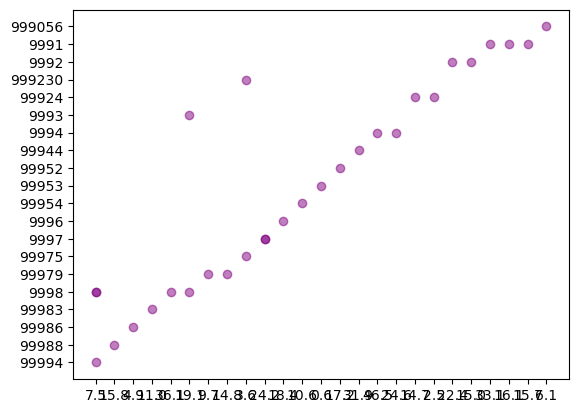

In [6]:
topemp = usadata[['EMP','EMP_S','PAYANN',]].sort_values(by = 'EMP', ascending=False)[:30]
topemp[['EMP','EMP_S','PAYANN']]
plt.scatter(y = topemp['EMP'],  # x-axis data
            x = topemp['EMP_S'],    # y-axis data
            #marker = 'x',            # shape of point 
            alpha = .5,             # color scale to denote frequency (alpha = 1 <=> same color for everything)
            color = 'purple');

In [17]:
statecount = statedata[['Name','EmpFirms', 'Industry']]
statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecount = statecount[(statecount['Industry']=='Professional, scientific, and technical services')]
statecount = statecount.groupby(['Name'], as_index=False)['EmpFirms'].sum()

statecount.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecount.rename(columns={'EmpFirms': 'Science'}, inplace=True)

statecount.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15940\228266200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')


,Name,Science
4,California,2969350
9,Florida,1906104
43,Texas,1592296
32,New York,1454819
13,Illinois,908842
10,Georgia,686159
38,Pennsylvania,665825
46,Virginia,654986
30,New Jersey,641779
33,North Carolina,580373


In [18]:
statecountu = statedata[['Name','EmpFirms', 'Industry']]
statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecountu = statecountu[(statecountu['Industry']=='Manufacturing')]
statecountu = statecountu.groupby(['Name'], as_index=False)['EmpFirms'].sum()
statecountu.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecountu.rename(columns={'EmpFirms': 'Manufacturing'}, inplace=True)

statecountu.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_15940\3615904019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')


,Name,Manufacturing
4,California,862550
43,Texas,413788
32,New York,356269
9,Florida,310586
38,Pennsylvania,284655
35,Ohio,283924
13,Illinois,275450
49,Wisconsin,175302
33,North Carolina,174790
30,New Jersey,167079


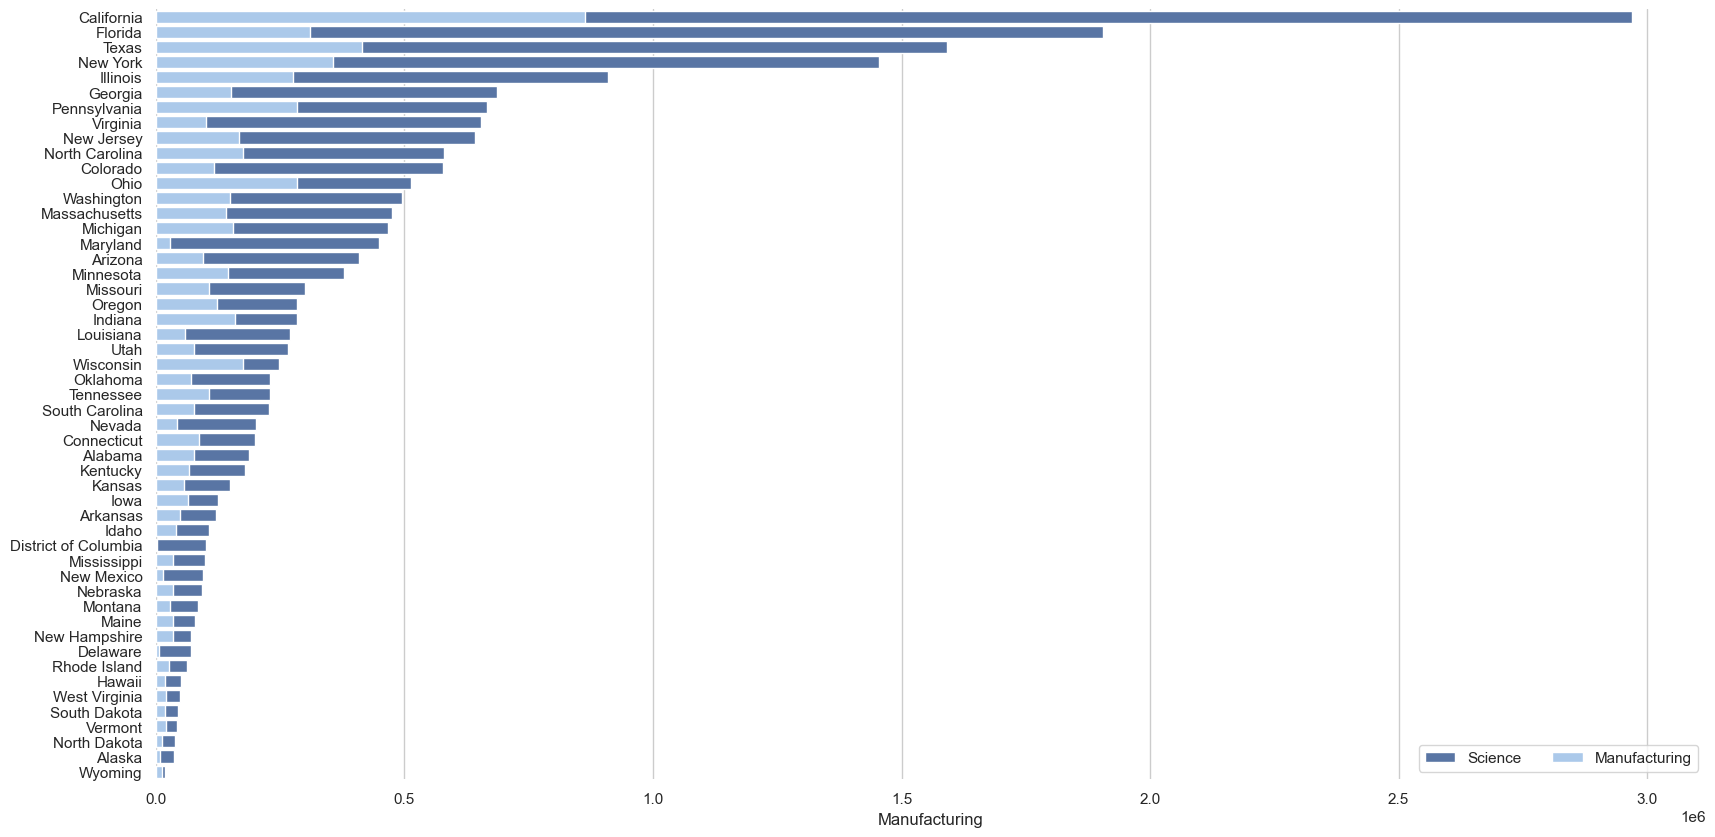

In [20]:
statecategoriesjoin = pd.merge(statecountu, statecount, on='Name')
statecategoriesjoin.sort_values(by='Science', ascending=False, inplace=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("deep")
sns.barplot(x="Science", y="Name", data=statecategoriesjoin,
            label="Science", color="b")    
sns.set_color_codes("pastel")
sns.barplot(x="Manufacturing", y="Name", data=statecategoriesjoin,
            label="Manufacturing", color="b")
      
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="")
sns.despine(left=True, bottom=True)

In [26]:
firmus = usadata[['EmpFirms','Sex']]
firmus['EmpFirms'] = firmus['EmpFirms'].astype('int')
firmus = firmus[(firmus['Sex']=='Female')|(firmus['Sex']=='Male')]
firmus = firmus.groupby(['Sex'], as_index=False)['EmpFirms'].sum()
firmus


C:\Users\Daniel\AppData\Local\Temp\ipykernel_18480\4127512238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firmus['EmpFirms'] = firmus['EmpFirms'].astype('int')


,Sex,EmpFirms
0,Female,22794065
1,Male,74856729


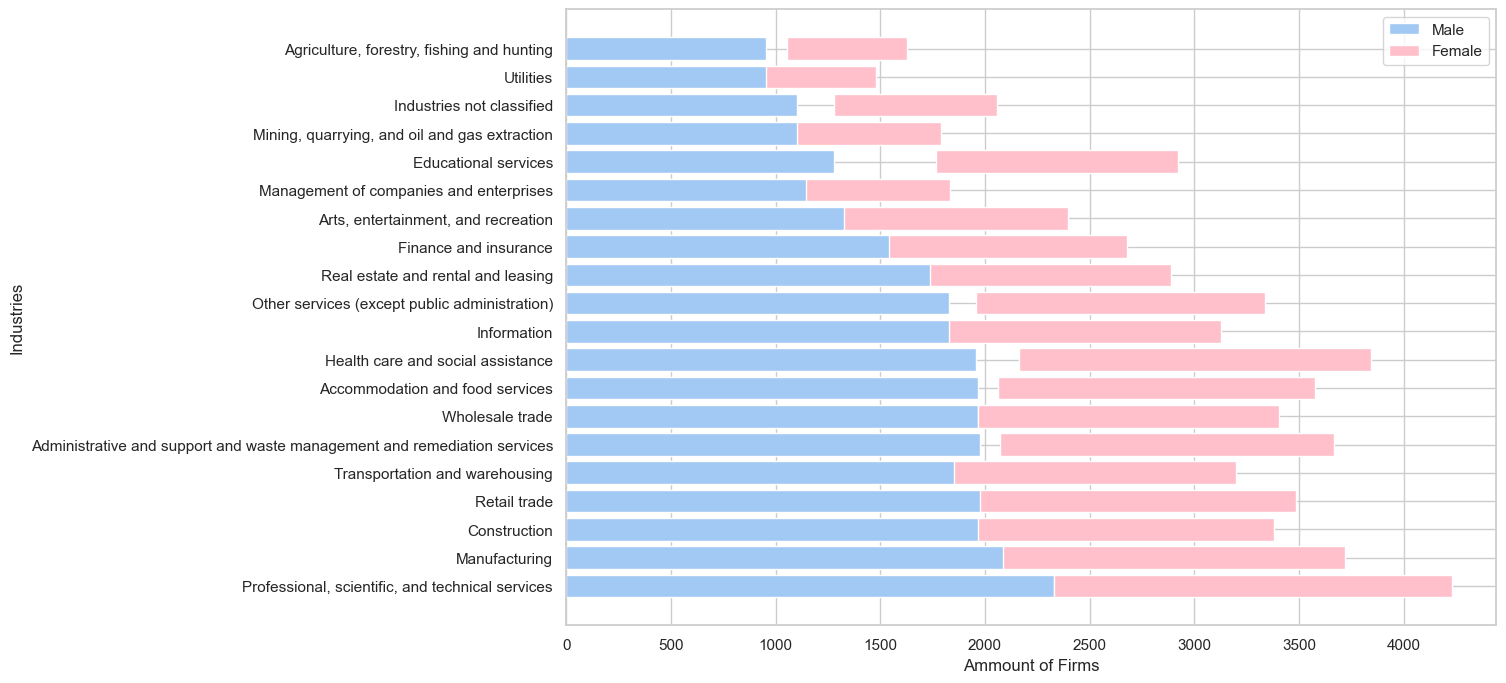

In [131]:
itotal = usadata[['Industry','Sex']]
itotal = itotal.groupby(['Industry', 'Sex']).size().reset_index(name='count')
itotal = itotal[itotal.Industry != 'Total for all sectors']
itotal = itotal[(itotal['Industry']!='Total for all sectors')]
itotal = itotal[(itotal['Sex']!='Total')]
itotal.sort_values(by='count', ascending=False, inplace=True)

imale = itotal[(itotal['Sex']=='Male')]
ifemale = itotal[(itotal['Sex']=='Female')]
iboth = itotal[(itotal['Sex']=="Equally male/female")]


#males = itotal[(itotal['Sex']=='Male')]

plt.figure(figsize = (12, 8))

#plt.legend("Male")

plt.barh(imale['Industry'],imale['count'], height=0.8, color='b')
plt.barh(ifemale['Industry'],ifemale['count'], color='pink',height=0.8, left=imale['count'])
plt.legend(["Male", "Female"])
plt.xlabel("Ammount of Firms")
plt.ylabel("Industries")
plt.show()



Text(0, 0.5, 'Industries')

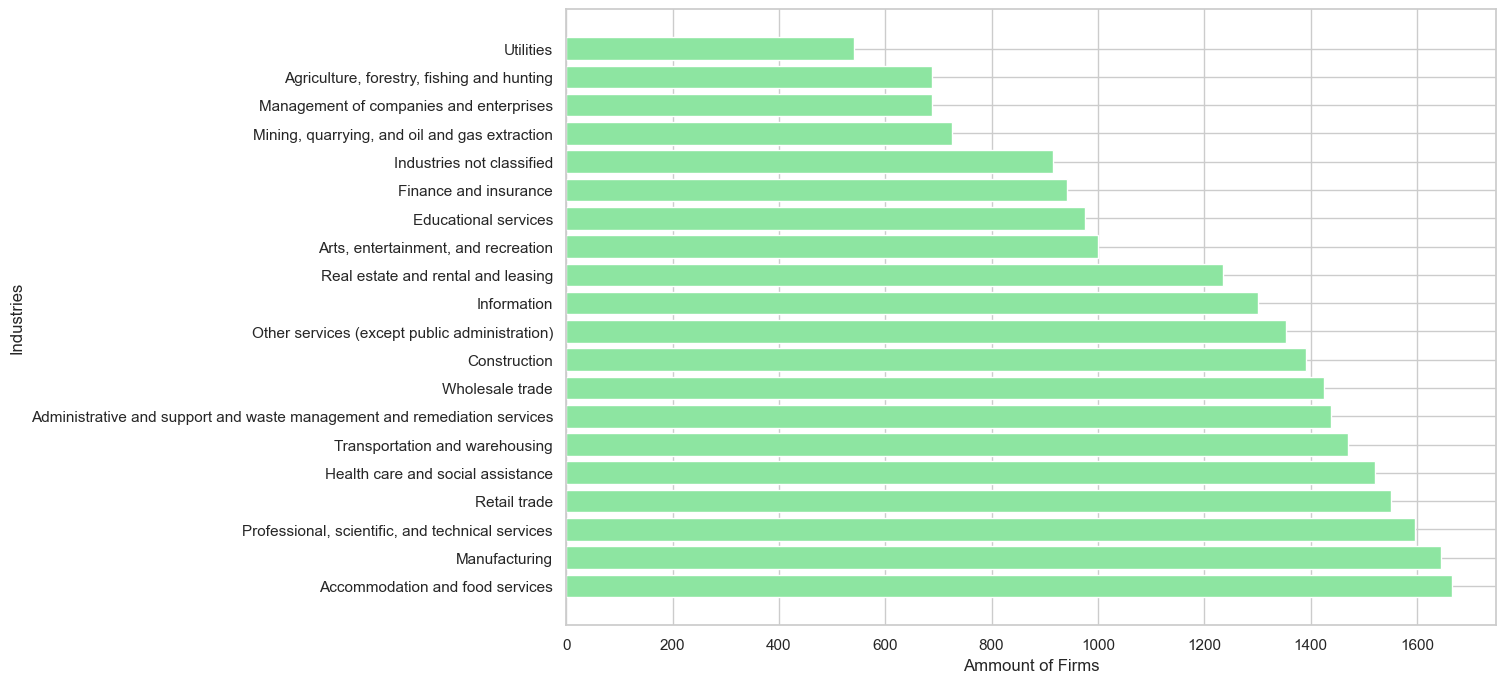

In [133]:
plt.figure(figsize = (12, 8))

plt.barh(iboth['Industry'],iboth['count'], color='g')
plt.xlabel("Ammount of Firms")
plt.ylabel("Industries")